# Linear Regression

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [27]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_stats_salary_18-19')
rbs = pd.read_csv('../Capstone_csv_file/rbs_stats_salary_18-19')
wrs = pd.read_csv('../Capstone_csv_file/wrs_stats_salary_18-19')
tes = pd.read_csv('../Capstone_csv_file/tes_stats_salary_18-19')

In [28]:
qbs.columns

Index(['NAME', 'COMP', 'ATT', 'ATT/G', 'YDS', '300+ YDS', 'COMP%', 'YDS/ATT',
       'YDS/COMP', 'TD', 'INT', 'QBR', 'LONG', 'SACKS', 'SACK YDS', 'FUML',
       'COMP_rank', 'ATT_rank', 'ATT/G_rank', 'YDS_rank', '300+ YDS_rank',
       'COMP%_rank', 'YDS/ATT_rank', 'YDS/COMP_rank', 'TD_rank', 'INT_rank',
       'QBR_rank', 'LONG_rank', 'SACKS_rank', 'SACK YDS_rank', 'FUML_rank',
       'salary'],
      dtype='object')

In [29]:
rbs.columns

Index(['NAME', 'ATT', 'YDS', 'YDS/ATT', 'ATT/G', '100+ YDS', 'TD', 'LONG',
       'FUM', 'FUML', 'YDS_rank', 'ATT_rank', 'YDS/ATT_rank', 'ATT/G_rank',
       '100+ YDS_rank', 'TD_rank', 'LONG_rank', 'FUM_rank', 'FUML_rank',
       'salary'],
      dtype='object')

In [30]:
wrs.columns

Index(['NAME', 'TGT', 'REC', 'TGT/G', 'YDS', '100+ YDS', 'YDS/REC', 'TD',
       'LONG', 'FUM', 'FUML', 'YDS_rank', 'TGT_rank', 'REC_rank', 'TGT/G_rank',
       '100+ YDS_rank', 'YDS/REC_rank', 'TD_rank', 'LONG_rank', 'FUM_rank',
       'FUML_rank', 'overall', 'salary'],
      dtype='object')

In [31]:
tes.columns

Index(['NAME', 'TGT', 'REC', 'TGT/G', 'YDS', '100+ YDS', 'YDS/REC', 'TD',
       'LONG', 'FUM', 'FUML', 'YDS_rank', 'TGT_rank', 'REC_rank', 'TGT/G_rank',
       '100+ YDS_rank', 'YDS/REC_rank', 'TD_rank', 'LONG_rank', 'FUM_rank',
       'FUML_rank', 'overall', 'salary'],
      dtype='object')

In [32]:
qbs = qbs[['NAME', 'YDS', 'TD', 'ATT', 'FUML', 'INT', 'salary']]
rbs = rbs[['NAME', 'YDS', 'TD', 'ATT', 'FUML', 'salary']]
wrs = wrs[['NAME', 'YDS', 'TD', 'TGT', 'FUML', 'salary']]
tes = tes[['NAME', 'YDS', 'TD', 'TGT', 'FUML', 'salary']]

In [33]:
offense = qbs.append(rbs)

In [34]:
offense = offense.append(wrs)

In [35]:
offense = offense.append(tes)

In [36]:
offense

,NAME,YDS,TD,ATT,FUML,INT,salary,TGT
0,Josh Johnson,590,3,91.0,0,4.0,915000,NaN
1,Jameis Winston,2992,19,378.0,3,14.0,6337819,NaN
2,Derek Anderson,465,0,70.0,2,4.0,1073530,NaN
3,Carson Wentz,3074,21,401.0,6,7.0,6669085,NaN
4,Mark Sanchez,138,0,35.0,0,3.0,915000,NaN
...,...,...,...,...,...,...,...,...
31,Gerald Everett,320,3,NaN,0,NaN,1511117,51.0
32,Virgil Green,210,1,NaN,0,NaN,2866667,27.0
33,Maxx Williams,143,1,NaN,0,NaN,1013185,17.0
34,Luke Stocker,165,2,NaN,0,NaN,1100000,21.0


In [37]:
offense.fillna(0, inplace = True)

In [38]:
offense

,NAME,YDS,TD,ATT,FUML,INT,salary,TGT
0,Josh Johnson,590,3,91.0,0,4.0,915000,0.0
1,Jameis Winston,2992,19,378.0,3,14.0,6337819,0.0
2,Derek Anderson,465,0,70.0,2,4.0,1073530,0.0
3,Carson Wentz,3074,21,401.0,6,7.0,6669085,0.0
4,Mark Sanchez,138,0,35.0,0,3.0,915000,0.0
...,...,...,...,...,...,...,...,...
31,Gerald Everett,320,3,0.0,0,0.0,1511117,51.0
32,Virgil Green,210,1,0.0,0,0.0,2866667,27.0
33,Maxx Williams,143,1,0.0,0,0.0,1013185,17.0
34,Luke Stocker,165,2,0.0,0,0.0,1100000,21.0


In [39]:
model = LinearRegression()

In [40]:
X = offense[['YDS', 'TD', 'ATT', 'TGT',
             'FUML', 'INT']]
y = offense['salary']

In [41]:
X.shape

(209, 6)

In [42]:
y.shape

(209,)

In [43]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = model.predict(X)

In [45]:
# def MSE(y_true, y_pred):
#     squared_error = 0
#     for i in range(len(y_true)):
#         squared_error += (y_true[i] - y_pred[i]) ** 2
#     return squared_error / len(y_true)
np.sqrt(metrics.mean_squared_error(y, y_pred))

4751738.861564416

In [46]:
model.intercept_

1564519.1417969689

In [47]:
model.coef_

array([   4619.59090952, -182628.52001993,   15683.2612297 ,
         30956.95759654, -565258.06077299, -360943.4639293 ])

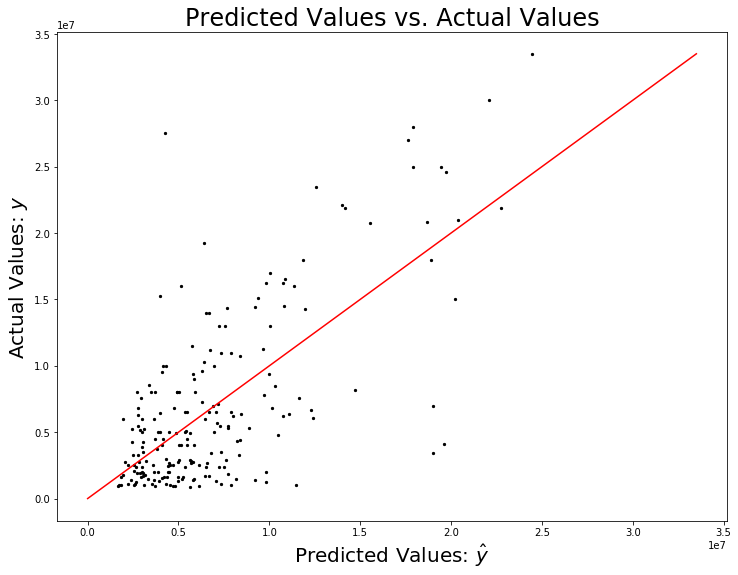

In [48]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [49]:
r2_score(y, y_pred)

0.4840616500742402